# EDA For User Data

In [32]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned_user_data.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka,Bucket list destinations mapped
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell...","[95, 23, 78]"
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati...","[124, 13, 14, 134, 17]"
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba...","[1, 45, 33]"
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C...","[123, 47, 45, 44, 59]"
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle...","[45, 47, 8, 10, 53]"


## Basic Data Overview

In [33]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# General information about the dataset
data.info()

# Statistical summary
data.describe()

# Check data types
print("Data types:\n", data.dtypes)

Missing values:
 User ID                               0
Name                                  0
Email                                 0
Preferred Activities                  0
Bucket list destinations Sri Lanka    0
Bucket list destinations mapped       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   User ID                             10000 non-null  int64 
 1   Name                                10000 non-null  object
 2   Email                               10000 non-null  object
 3   Preferred Activities                10000 non-null  object
 4   Bucket list destinations Sri Lanka  10000 non-null  object
 5   Bucket list destinations mapped     10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
Data types:
 User ID                                int64
N

## Most Preferred Activities

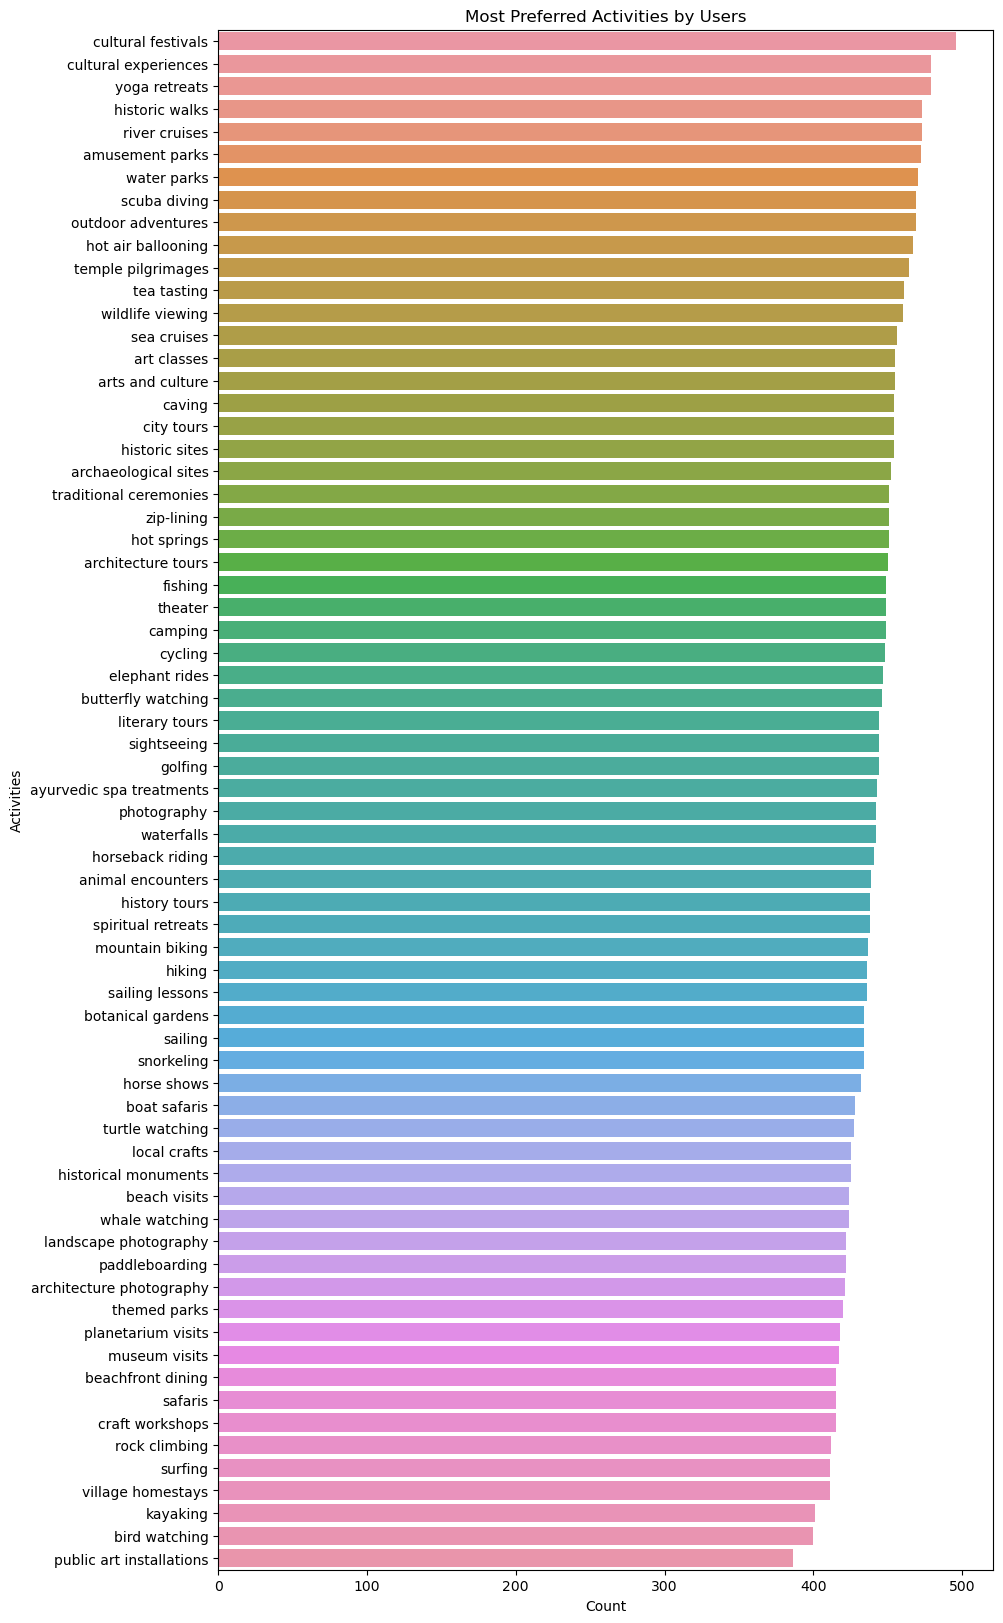

In [34]:
import ast

# Expand the 'Preferred Activities' into multiple rows for each user
data['Preferred Activities'] = data['Preferred Activities'].apply(lambda x: ast.literal_eval(x))

# Count the frequency of each activity
activities_list = [activity for activities in data['Preferred Activities'] for activity in activities]
activities_df = pd.DataFrame(activities_list, columns=['Activity'])

# Plot the most preferred activities
plt.figure(figsize=(10,20))
sns.countplot(y='Activity', data=activities_df, order=activities_df['Activity'].value_counts().index)
plt.title("Most Preferred Activities by Users")
plt.xlabel("Count")
plt.ylabel("Activities")
plt.show()


## Most Popular Bucket List Destinations

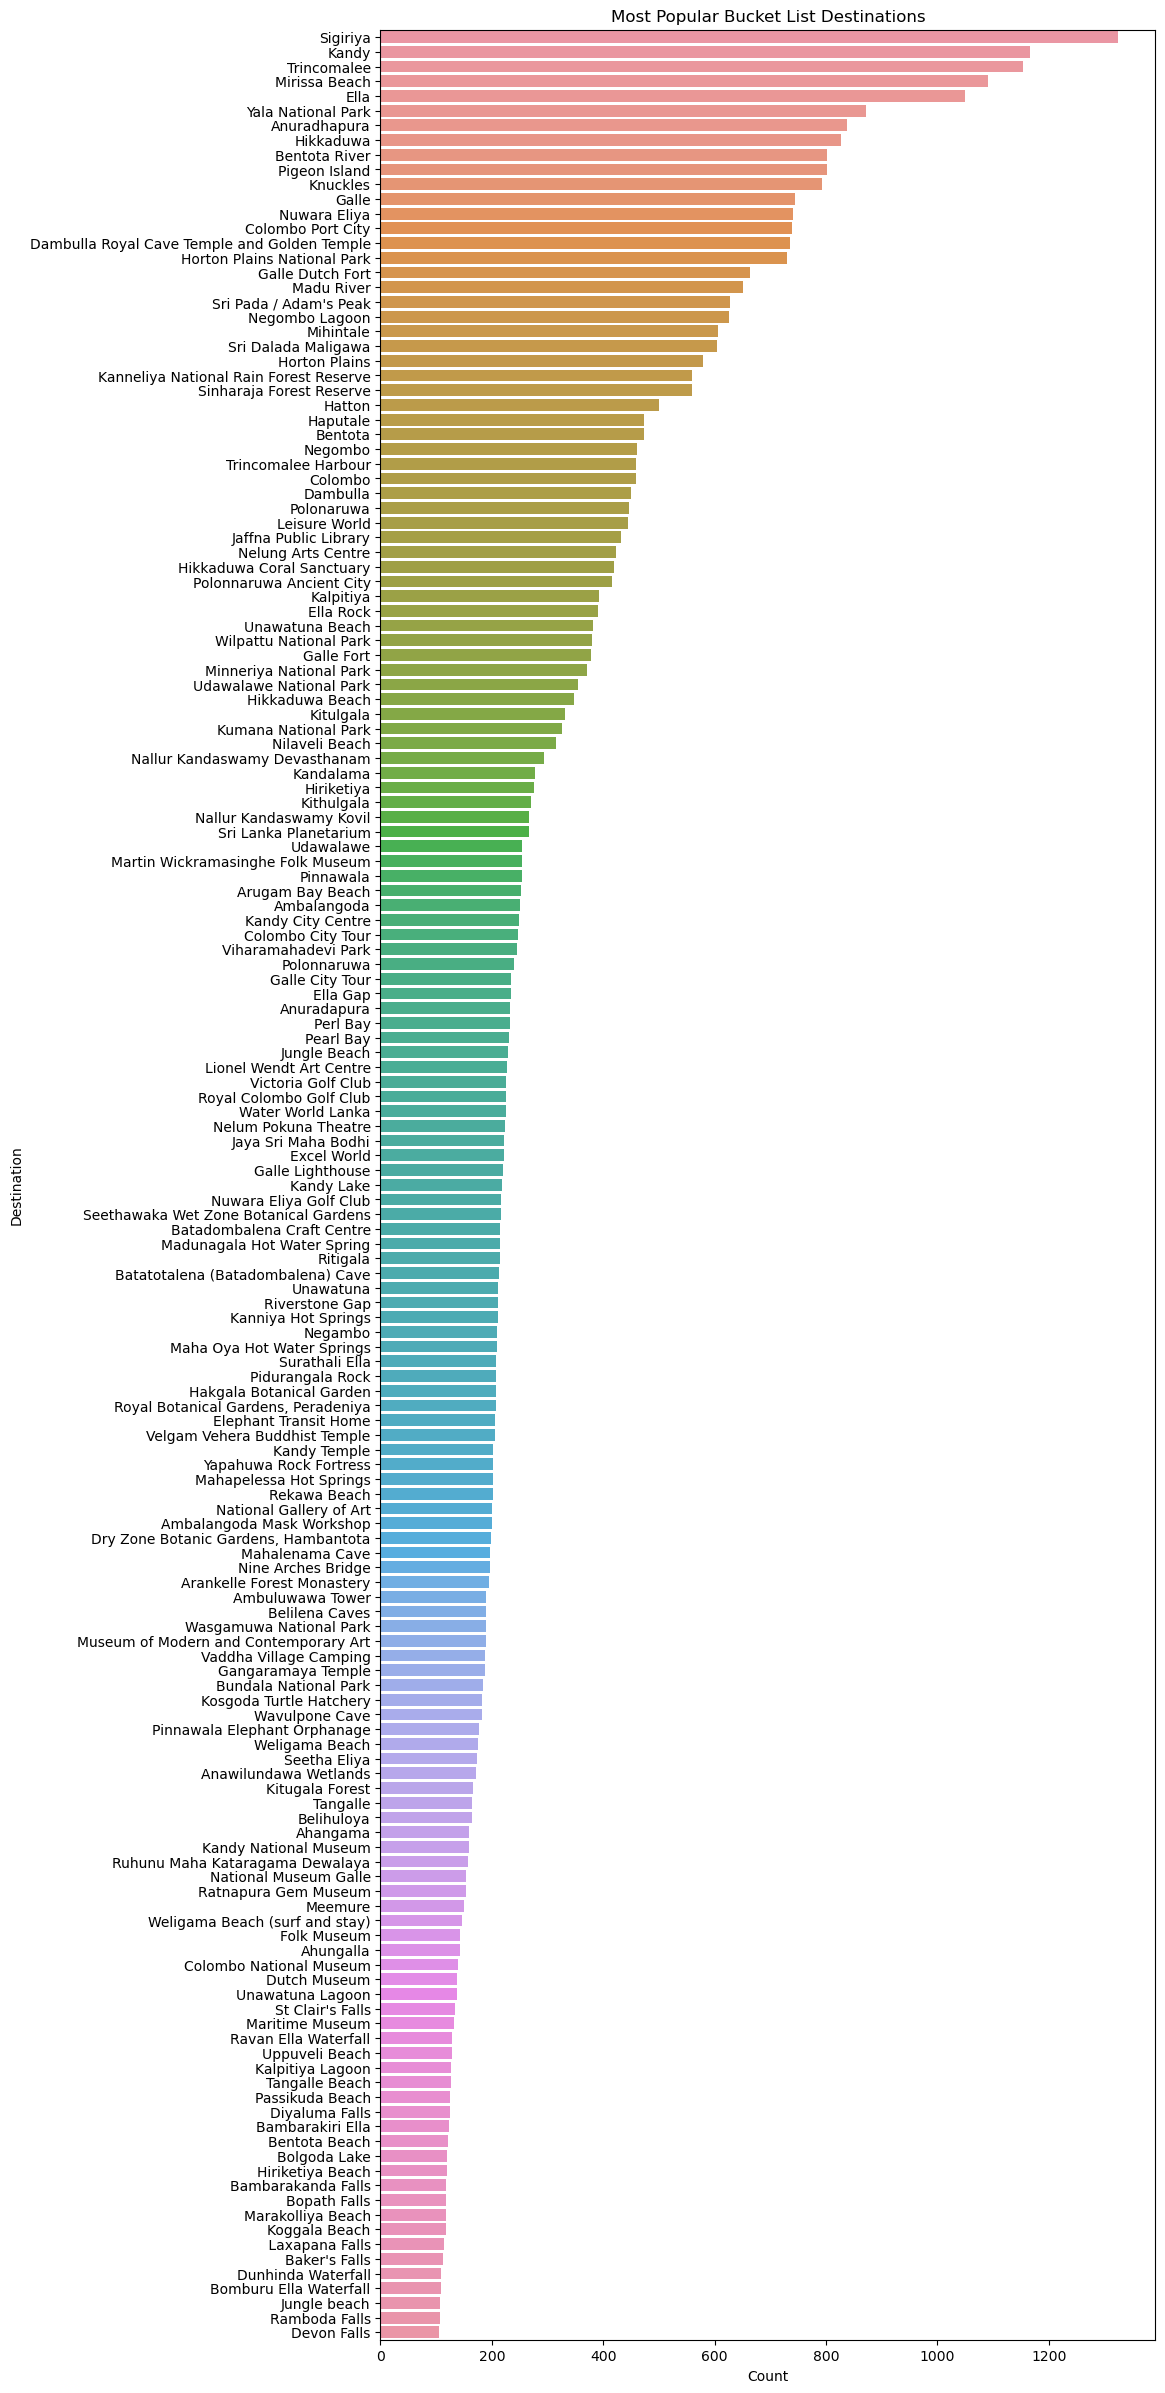

In [35]:
# Expand the 'Bucket list destinations Sri Lanka' into multiple rows for each user
data['Bucket list destinations Sri Lanka'] = data['Bucket list destinations Sri Lanka'].apply(lambda x: ast.literal_eval(x))

# Count the frequency of each destination
bucket_list = [destination for destinations in data['Bucket list destinations Sri Lanka'] for destination in destinations]
bucket_df = pd.DataFrame(bucket_list, columns=['Destination'])

# Plot the most popular bucket list destinations
plt.figure(figsize=(10,30))
sns.countplot(y='Destination', data=bucket_df, order=bucket_df['Destination'].value_counts().index)
plt.title("Most Popular Bucket List Destinations")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.show()

## Word Cloud for Most Common Activities

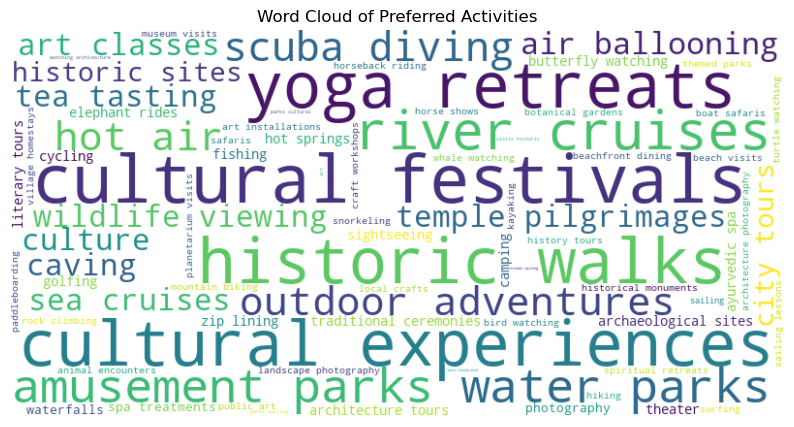

In [45]:
from wordcloud import WordCloud

# Combine all activities into a single string
all_activities = ' '.join([' '.join(activity_list) for activity_list in data['Preferred Activities']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_activities)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Preferred Activities")
plt.show()
